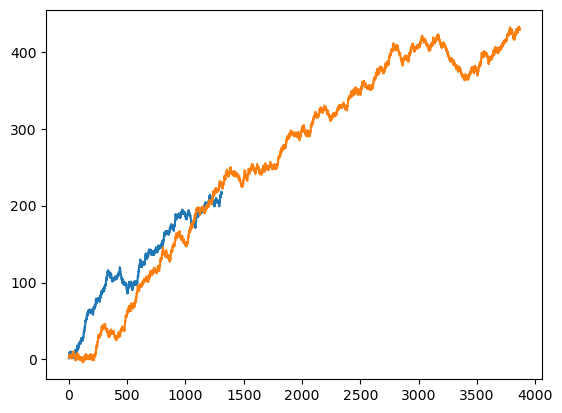

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ml_df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_EURUSD_H1_2007_2023.csv")
ml_df = ml_df.iloc[:1313]
ml_df = ml_df[['label']]
ml_df['Return'] = np.where(ml_df['label'] == 1, 2, -1)
ml_df['Cumulative Return'] = ml_df['Return'].cumsum()

dummy_df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/dummy_trades_seq_EURUSD_H1_2007_2023.csv")
# take first 1313 rows
# dummy_df = dummy_df.iloc[:1313]
dummy_df = dummy_df[['label']]
dummy_df['Return'] = np.where(dummy_df['label'] == 1, 2, -1)
dummy_df['Cumulative Return'] = dummy_df['Return'].cumsum()

# create a plot of the cumulative return
plt.plot(ml_df['Cumulative Return'], label = "ML")
plt.plot(dummy_df['Cumulative Return'], label = "Dummy")

In [9]:
ml_df

,label,Return,Cumulative Return
0,1,2,2
1,0,-1,1
2,1,2,3
3,1,2,5
4,1,2,7
...,...,...,...
1309,0,-1,217
1310,0,-1,216
1311,0,-1,215
1312,1,2,217


In [14]:
dummy_df

,label,Return,Cumulative Return
0,1,2,2
1,1,2,4
2,1,2,6
3,0,-1,5
4,0,-1,4
...,...,...,...
1308,1,2,230
1309,0,-1,229
1310,1,2,231
1311,0,-1,230


In [3]:
# df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_EURUSD_H1_2007_2023.csv")
# df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/dummy_trades_seq_EURUSD_H1_2007_2023.csv")

df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_USDJPY_H1_2007_2023.csv")
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Year'] = df['Date_Time'].dt.year
df['Return'] = np.where(df['label'] == 1, 2, -1)

df = df[['Year', 'Return', 'label']]

# # for each year, sum the returns and count the number of labels as trades
# df = df.groupby(['Year']).agg({'Return': 'sum', 'label': 'count'}).reset_index()
# df['trades'] = df['label']
# df.drop(['label'], axis=1, inplace=True)
# df['Percent Return'] = (df['Return'] / df['trades']) * 100

df

,Year,Return,label
0,2007,-1,0
1,2007,-1,0
2,2007,2,1
3,2007,2,1
4,2007,-1,0
...,...,...,...
892,2023,-1,0
893,2023,-1,0
894,2023,-1,0
895,2023,2,1


In [17]:
df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_EURUSD_H1_2007_2023.csv")
# df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/dummy_trades_seq_EURUSD_H1_2007_2023.csv")
# df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_USDJPY_H1_2007_2023.csv")
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Year'] = df['Date_Time'].dt.year
df['Return'] = np.where(df['label'] == 1, 2, -1)

max_drawdown_df = df.copy()
max_drawdown_df = max_drawdown_df[['Year', 'Return', 'label']]
# Create Max Drawdown column
max_drawdown = 0
max_drawdown_column = []

for index, row in max_drawdown_df.iterrows():
    if row['Return'] == 2:
        max_drawdown = 0
    elif row['Return'] == -1:
        max_drawdown += 1

    max_drawdown_column.append(max_drawdown)

max_drawdown_df['Max Drawdown'] = max_drawdown_column
# every year use the maximum of the max drawdown column
max_drawdown_df = max_drawdown_df.groupby(['Year']).agg({'Max Drawdown': 'max'}).reset_index()


# for each year, sum the returns and count the number of labels as trades
df = df.groupby(['Year']).agg({'Return': 'sum', 'label': 'count'}).reset_index()

df['trades'] = df['label']
df.drop(['label'], axis=1, inplace=True)
df['Percent Return'] = (df['Return'] / df['trades']) * 100


# merge the two dataframes
df = pd.merge(df, max_drawdown_df, on='Year')
df

,Year,Return,trades,Percent Return,Max Drawdown
0,2007,12,60,20.000000,7
1,2008,33,81,40.740741,6
2,2009,13,68,19.117647,6
3,2010,31,71,43.661972,6
4,2011,17,97,17.525773,11
5,2012,-7,94,-7.446809,16
6,2013,-9,75,-12.000000,13
7,2014,32,79,40.506329,10
8,2015,15,105,14.285714,6
9,2016,18,84,21.428571,6


In [16]:
df

,Year,Return,trades,Percent Return
0,2007,12,60,20.000000
1,2008,33,81,40.740741
2,2009,13,68,19.117647
3,2010,31,71,43.661972
4,2011,17,97,17.525773
5,2012,-7,94,-7.446809
6,2013,-9,75,-12.000000
7,2014,32,79,40.506329
8,2015,15,105,14.285714
9,2016,18,84,21.428571


In [10]:
import pandas as pd

# Sample DataFrame
data = {'Year': [2007, 2007, 2008, 2008, 2009],
        'Return': [2, -1, 2, 2, 2],
        'label': [1, 0, 1, 1, 1]}

max_drawdown_df = pd.DataFrame(data)

# Create Max Drawdown column
max_drawdown = 0
max_drawdown_column = []

for index, row in max_drawdown_df.iterrows():
    if row['Return'] == 2:
        max_drawdown = 0
    elif row['Return'] == -1:
        max_drawdown += 1

    max_drawdown_column.append(max_drawdown)

max_drawdown_df['Max Drawdown'] = max_drawdown_column

max_drawdown_df

,Year,Return,label,Max Drawdown
0,2007,2,1,0
1,2007,-1,0,1
2,2008,2,1,0
3,2008,2,1,0
4,2009,2,1,0


In [40]:
# df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/ml_2_trades_threshold_0.5_seq_EURUSD_H1_2007_2023.csv")
df = pd.read_csv("/projects/genomic-ml/da2343/ml_project_2/cnn/dummy_trades_seq_EURUSD_H1_2007_2023.csv")
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Year'] = df['Date_Time'].dt.year
df['Return'] = np.where(df['label'] == 1, 2, -1)

df = df[['Year', 'Return', 'label']]

# for each year, sum the returns and count the number of labels as trades
df = df.groupby(['Year']).agg({'Return': 'sum', 'label': 'count'}).reset_index()
df['trades'] = df['label']
df.drop(['label'], axis=1, inplace=True)

df

,Year,Return,trades
0,2007,5,160
1,2008,58,347
2,2009,72,324
3,2010,60,324
4,2011,31,329
5,2012,22,260
6,2013,43,218
7,2014,27,162
8,2015,24,285
9,2016,25,215
